In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from sklearn.metrics import classification_report
import sklearn.metrics
import math
import matplotlib.dates as dates

In [2]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

In [3]:
ibex=pd.read_csv("ibex35b.csv")

In [4]:
ibex

,<TICKER>,<PER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,^IBEX,D,20000103,0,11641.400000,11881.800000,11574.400000,11610.000000,0,0
1,^IBEX,D,20000104,0,11530.000000,11530.000000,11159.800000,11206.600000,0,0
2,^IBEX,D,20000105,0,11068.100000,11068.100000,10824.900000,10863.100000,0,0
3,^IBEX,D,20000107,0,10882.700000,11137.900000,10882.700000,11102.400000,0,0
4,^IBEX,D,20000110,0,11120.600000,11364.300000,11120.600000,11173.300000,0,0
5,^IBEX,D,20000111,0,11173.300000,11234.600000,10919.900000,11012.400000,0,0
6,^IBEX,D,20000112,0,10947.100000,10947.100000,10821.400000,10851.800000,0,0
7,^IBEX,D,20000113,0,10851.800000,11169.800000,10827.600000,10931.900000,0,0
8,^IBEX,D,20000114,0,10976.300000,11212.100000,10976.300000,11184.000000,0,0
9,^IBEX,D,20000117,0,11191.500000,11394.200000,11191.500000,11285.600000,0,0


In [5]:
ibex.describe()

,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
count,4.391000e+03,4391.0,4391.000000,4391.000000,4391.000000,4391.000000,4.391000e+03,4391.0
mean,2.008268e+07,0.0,9807.366592,9885.073128,9716.917261,9804.238832,9.883018e+07,0.0
std,4.990854e+04,0.0,2133.368682,2138.744417,2127.686408,2134.029272,1.342403e+08,0.0
min,2.000010e+07,0.0,5294.800000,5462.600000,5266.900000,5364.500000,0.000000e+00,0.0
25%,2.004052e+07,0.0,8286.050000,8353.750000,8202.050000,8283.700000,1.430000e+05,0.0
50%,2.008092e+07,0.0,9627.600000,9707.400000,9535.800000,9633.500000,2.732000e+05,0.0
75%,2.013011e+07,0.0,10934.950000,11031.100000,10843.400000,10923.250000,2.149729e+08,0.0
max,2.017042e+07,0.0,15999.200000,16040.400000,15868.600000,15945.700000,7.894902e+08,0.0


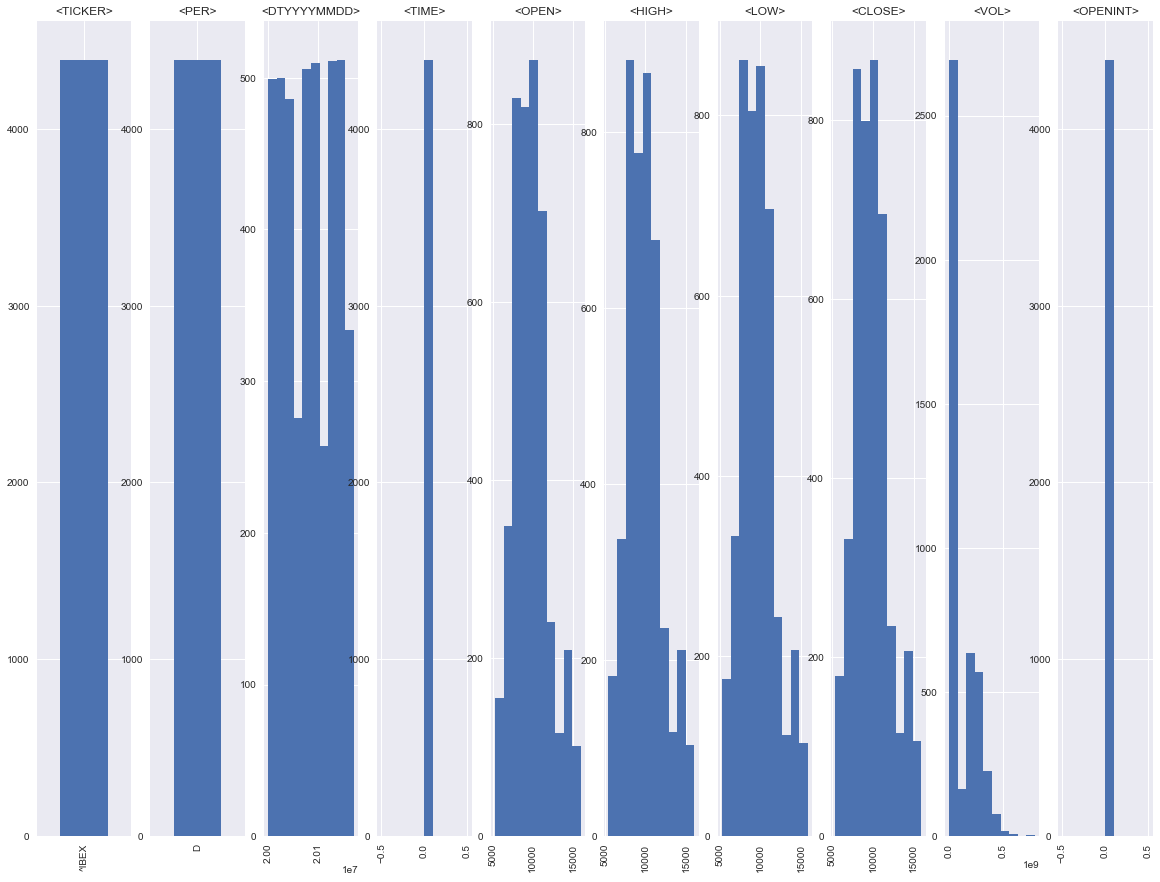

In [6]:
fig = plt.figure(figsize=(20,15))
cols = 10
rows = math.ceil(float(ibex.shape[1]) / cols)
for i, column in enumerate(ibex.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if ibex.dtypes[column] == np.object:
        ibex[column].value_counts().plot(kind="bar", axes=ax)
    else:
        ibex[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

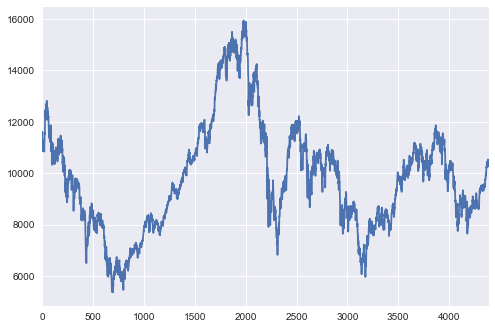

In [7]:
ibex["<CLOSE>"].plot()

In [8]:
ibex

,<TICKER>,<PER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,^IBEX,D,20000103,0,11641.400000,11881.800000,11574.400000,11610.000000,0,0
1,^IBEX,D,20000104,0,11530.000000,11530.000000,11159.800000,11206.600000,0,0
2,^IBEX,D,20000105,0,11068.100000,11068.100000,10824.900000,10863.100000,0,0
3,^IBEX,D,20000107,0,10882.700000,11137.900000,10882.700000,11102.400000,0,0
4,^IBEX,D,20000110,0,11120.600000,11364.300000,11120.600000,11173.300000,0,0
5,^IBEX,D,20000111,0,11173.300000,11234.600000,10919.900000,11012.400000,0,0
6,^IBEX,D,20000112,0,10947.100000,10947.100000,10821.400000,10851.800000,0,0
7,^IBEX,D,20000113,0,10851.800000,11169.800000,10827.600000,10931.900000,0,0
8,^IBEX,D,20000114,0,10976.300000,11212.100000,10976.300000,11184.000000,0,0
9,^IBEX,D,20000117,0,11191.500000,11394.200000,11191.500000,11285.600000,0,0


In [9]:
seriesDate=ibex["<DTYYYYMMDD>"]
seriesDate

0       20000103
1       20000104
2       20000105
3       20000107
4       20000110
5       20000111
6       20000112
7       20000113
8       20000114
9       20000117
10      20000118
11      20000119
12      20000120
13      20000121
14      20000124
15      20000125
16      20000126
17      20000127
18      20000128
19      20000131
20      20000201
21      20000202
22      20000203
23      20000204
24      20000207
25      20000208
26      20000209
27      20000210
28      20000211
29      20000214
          ...   
4361    20170309
4362    20170310
4363    20170313
4364    20170314
4365    20170315
4366    20170316
4367    20170317
4368    20170320
4369    20170321
4370    20170322
4371    20170323
4372    20170324
4373    20170327
4374    20170328
4375    20170329
4376    20170330
4377    20170331
4378    20170403
4379    20170404
4380    20170405
4381    20170406
4382    20170407
4383    20170410
4384    20170411
4385    20170412
4386    20170413
4387    20170418
4388    201704

In [10]:
x = np.array([1, 2, 3, 4, 5, 6], np.int64)
seriesx=pd.Series(x)
seriesx

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [11]:
date=20170421
seriesDate[seriesDate == date].index[0]

4390

In [12]:
def media_movil(date, days):
    mediaMovil=None
    seriesClose=ibex["<CLOSE>"]
    seriesDate=ibex["<DTYYYYMMDD>"]
    indice=seriesDate[seriesDate == date].index[0]
    listMediaDays=[]
    if (indice-days)>=0:
        for i in range(days):
            numeroCierre=seriesClose[indice-i]
            listMediaDays.append(numeroCierre)
        npListCierres = np.array(listMediaDays)
        mediaMovil=npListCierres.mean()
    return mediaMovil

In [13]:
ibex["MediaMovil"]=seriesDate.apply(media_movil,args=(20,))

KeyboardInterrupt: 

In [ ]:
ibex

In [ ]:
ibex.plot(x='<DTYYYYMMDD>', y='<CLOSE>')
ibex.plot(x='<DTYYYYMMDD>', y='MediaMovil')

In [ ]:
ibex['DateTime'] = pd.to_datetime(ibex['<DTYYYYMMDD>'].astype(str), format='%Y%m%d')

In [ ]:
ibex

In [ ]:
fig, ax1 = plt.subplots()

x = ibex['DateTime'][-30:]
y1 = ibex['<CLOSE>'][-30:]
y2 = ibex['MediaMovil'][-30:]

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

In [ ]:
fig, ax1 = plt.subplots()

x = ibex['DateTime']
y1 = ibex['<CLOSE>']
y2 = ibex['MediaMovil']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

In [ ]:
ibex["MediaMovil2"]=seriesDate.apply(media_movil,args=(30,))

In [ ]:
ibex

In [ ]:
fig, ax1 = plt.subplots()

x = ibex['DateTime'][-120:]
y1 = ibex['MediaMovil'][-120:]
y2 = ibex['MediaMovil2'][-120:]

ax2 = ax1.twinx()


ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

In [ ]:
ibex['MediaMovil']

In [ ]:
dateListCrossVenta=[]
closeListVenta=[]
for i in range(ibex['MediaMovil'].size-1):
    if (ibex['MediaMovil'][i]>=ibex['MediaMovil2'][i]) and (ibex['MediaMovil2'][i+1]>=ibex['MediaMovil'][i+1]):
        dateListCrossVenta.append(ibex['DateTime'][i+1])
        closeListVenta.append(ibex['<CLOSE>'][i+1])
        #print(ibex['MediaMovil'][i+1],"--",ibex['MediaMovil2'][i+1], "Cierre: ", ibex['<CLOSE>'][i+1])
serieMedia2Supera1 = pd.Series(closeListVenta, index=dateListCrossVenta)
serieMedia2Supera1

In [ ]:
dateListCrossCompra=[]
closeListCompra=[]
for i in range(ibex['MediaMovil'].size-1):
    if (ibex['MediaMovil2'][i]>=ibex['MediaMovil'][i]) and (ibex['MediaMovil'][i+1]>=ibex['MediaMovil2'][i+1]):
        dateListCrossCompra.append(ibex['DateTime'][i+1])
        closeListCompra.append(ibex['<CLOSE>'][i+1])
        #print(ibex['MediaMovil2'][i+1],"--",ibex['MediaMovil'][i+1], "Cierre: ", ibex['<CLOSE>'][i+1])
serieMedia1Supera2 = pd.Series(closeListCompra, index=dateListCrossCompra)
serieMedia1Supera2

In [ ]:
def post_date(date1, date2):
    majorDate=date1
    if date2.year > date1.year:
        majorDate=date2
    elif date2.year == date1.year:
        if date2.month > date1.month:
            majorDate=date2
        elif date2.month == date1.month:
            if date2.day > date1.day:
                majorDate=date2
    return majorDate

In [ ]:
def beneficioVentaCompra(indiceVenta):
    beneficio=0
    dateVenta=serieMedia2Supera1[serieMedia2Supera1==serieMedia2Supera1[indiceVenta]].index[0]
    for i in range(indiceVenta, serieMedia1Supera2.size):
        dateCompra=serieMedia1Supera2[serieMedia1Supera2==serieMedia1Supera2[i]].index[0]
        if(post_date(dateCompra, dateVenta) is dateCompra):
            beneficio=serieMedia2Supera1[indiceVenta]-serieMedia1Supera2[i]
            print("Fecha(Venta): ",dateVenta,"->Cierre: ",serieMedia2Supera1[indiceVenta], "--- Fecha(Compra): ", dateCompra,"->Cierre: ",serieMedia1Supera2[i], "--BENEFICIO: ",beneficio)
            return beneficio
    return beneficio

In [ ]:
def beneficioCompraVenta(indiceCompra):
    beneficio=0
    dateCompra=serieMedia1Supera2[serieMedia1Supera2==serieMedia1Supera2[indiceCompra]].index[0]
    for i in range(indiceCompra, serieMedia2Supera1.size):
        dateVenta=serieMedia2Supera1[serieMedia2Supera1==serieMedia2Supera1[i]].index[0]
        if(post_date(dateVenta, dateCompra) is dateVenta):
            beneficio=serieMedia2Supera1[i]-serieMedia1Supera2[indiceCompra]
            #print("Fecha(Compra): ",dateCompra,"->Cierre: ",serieMedia1Supera2[indiceCompra], "-Fecha(Venta): ", dateVenta,"->Cierre: ",serieMedia2Supera1[i], "-BENEFICIO: ",beneficio)
            return beneficio
    return beneficio

In [ ]:
ibex["MediaMovil"]=seriesDate.apply(media_movil,args=(15,))
ibex["MediaMovil2"]=seriesDate.apply(media_movil,args=(35,))

In [ ]:
MejorBeneficioVentaCompra=0
MejorBeneficioCompraVenta=0
MejorMediasMovilesVentaCompra=[]
MejorMediasMovilesCompraVenta=[]
listaMedias=[5, 10, 15, 20, 25, 30, 35]
for i in range(len(listaMedias)-1):
    ibex["MediaMovil"]=seriesDate.apply(media_movil,args=(listaMedias[i],))
    for j in range(i+1, len(listaMedias)):
        
        #Traza Medias
        print("Media1: ", listaMedias[i], "-- Media2: ", listaMedias[j])
        
        ibex["MediaMovil2"]=seriesDate.apply(media_movil,args=(listaMedias[j],))
        
        #Calculo Ventas
        dateListCrossVenta=[]
        closeListVenta=[]
        for v in range(ibex['MediaMovil'].size-1):
            if (ibex['MediaMovil'][v]>=ibex['MediaMovil2'][v]) and (ibex['MediaMovil2'][v+1]>=ibex['MediaMovil'][v+1]):
                dateListCrossVenta.append(ibex['DateTime'][v+1])
                closeListVenta.append(ibex['<CLOSE>'][v+1])
                #print(ibex['MediaMovil'][v+1],"--",ibex['MediaMovil2'][v+1], "Cierre: ", ibex['<CLOSE>'][v+1])
        serieMedia2Supera1 = pd.Series(closeListVenta, index=dateListCrossVenta)
        
        #Calculo Compras
        dateListCrossCompra=[]
        closeListCompra=[]
        for c in range(ibex['MediaMovil'].size-1):
            if (ibex['MediaMovil2'][c]>=ibex['MediaMovil'][c]) and (ibex['MediaMovil'][c+1]>=ibex['MediaMovil2'][c+1]):
                dateListCrossCompra.append(ibex['DateTime'][c+1])
                closeListCompra.append(ibex['<CLOSE>'][c+1])
                #print(ibex['MediaMovil2'][c+1],"--",ibex['MediaMovil'][c+1], "Cierre: ", ibex['<CLOSE>'][c+1])
        serieMedia1Supera2 = pd.Series(closeListCompra, index=dateListCrossCompra)
        
        
        
        
        #Beneficio Venta-Compra
        beneficioVentaCompraVar=0
        for bvc in range(serieMedia2Supera1.size):
            beneficioVentaCompraVar=beneficioVentaCompraVar+beneficioVentaCompra(bvc)
            
        #Traza Beneficio Venta-Compra
        print("Beneficio Venta-Compra: ", beneficioVentaCompraVar)
            
        if beneficioVentaCompraVar>MejorBeneficioVentaCompra:
            MejorBeneficioVentaCompra=beneficioVentaCompraVar
            MejorMediasMovilesVentaCompra=[listaMedias[i], listaMedias[j]]
        
        #Traza Mejor Beneficio Venta-Compra
        #print("Mejor Beneficio Venta-Compra hasta ahora: ", MejorBeneficioVentaCompra)
        #print("Mejor Medias Moviles Venta-Compra hasta ahora: ", MejorMediasMovilesVentaCompra)
        
        
        
        
        #Beneficio Compra-Venta
        beneficioCompraVentaVar=0
        for bcv in range(serieMedia1Supera2.size):
            beneficioCompraVentaVar=beneficioCompraVentaVar+beneficioCompraVenta(bcv)
            
        #Traza Beneficio Compra-Venta
        print("Beneficio Compra-Venta: ", beneficioCompraVentaVar)
            
        if beneficioCompraVentaVar>MejorBeneficioCompraVenta:
            MejorBeneficioCompraVenta=beneficioCompraVentaVar
            MejorMediasMovilesCompraVenta=[listaMedias[i], listaMedias[j]]
        


In [ ]:
print("MejorBeneficio (Venta-Compra): ",MejorBeneficioVentaCompra)
print("MejorBeneficio (Compra-Venta): ",MejorBeneficioCompraVenta)
print("Mejor Medias Moviles (Venta-Compra): ",MejorMediasMovilesVentaCompra[0], "--", MejorMediasMovilesVentaCompra[1])
print("Mejor Medias Moviles (Compra-Venta): ",MejorMediasMovilesCompraVenta[0], "--", MejorMediasMovilesCompraVenta[1])

In [ ]:
#Calculo Ventas
dateListCrossVenta=[]
closeListVenta=[]
for v in range(ibex['MediaMovil'].size-1):
    if (ibex['MediaMovil'][v]>=ibex['MediaMovil2'][v]) and (ibex['MediaMovil2'][v+1]>=ibex['MediaMovil'][v+1]):
        dateListCrossVenta.append(ibex['DateTime'][v+1])
        closeListVenta.append(ibex['<CLOSE>'][v+1])
        #print(ibex['MediaMovil'][v+1],"--",ibex['MediaMovil2'][v+1], "Cierre: ", ibex['<CLOSE>'][v+1])
serieMedia2Supera1 = pd.Series(closeListVenta, index=dateListCrossVenta)

In [ ]:
#Calculo Compras
dateListCrossCompra=[]
closeListCompra=[]
for c in range(ibex['MediaMovil'].size-1):
    if (ibex['MediaMovil2'][c]>=ibex['MediaMovil'][c]) and (ibex['MediaMovil'][c+1]>=ibex['MediaMovil2'][c+1]):
        dateListCrossCompra.append(ibex['DateTime'][c+1])
        closeListCompra.append(ibex['<CLOSE>'][c+1])
        #print(ibex['MediaMovil2'][c+1],"--",ibex['MediaMovil'][c+1], "Cierre: ", ibex['<CLOSE>'][c+1])
serieMedia1Supera2 = pd.Series(closeListCompra, index=dateListCrossCompra)

In [ ]:
#Beneficio Venta-Compra
beneficioVentaCompraVar=0
for bvc in range(serieMedia2Supera1.size):
    beneficioVentaCompraVar=beneficioVentaCompraVar+beneficioVentaCompra(bvc)
print("Beneficio Venta-Compra: ", beneficioVentaCompraVar)    


#Beneficio Compra-Venta
beneficioCompraVentaVar=0
for bcv in range(serieMedia1Supera2.size):
    beneficioCompraVentaVar=beneficioCompraVentaVar+beneficioCompraVenta(bcv) 
#print("Beneficio Compra-Venta: ", beneficioCompraVentaVar)   

#Beneficio Total
beneficioTotal=beneficioVentaCompraVar+beneficioCompraVentaVar
#print(beneficioTotal)

In [ ]:
#Beneficio Venta-Compra Acumulativo (Tendencia)
beneficioVentaCompraVar=0
listaTendenciaVentaCompra=[]
for bvc in range(serieMedia2Supera1.size):
    beneficioVentaCompraVar=beneficioVentaCompraVar+beneficioVentaCompra(bvc)
    listaTendenciaVentaCompra.append(beneficioVentaCompraVar)   
serieTendenciaVentaCompra = pd.Series(listaTendenciaVentaCompra)
serieTendenciaVentaCompra.size

In [ ]:
#Beneficio Compra-Venta Acumulativo (Tendencia)
beneficioCompraVentaVar=0
listaTendenciaCompraVenta=[]
for bcv in range(serieMedia1Supera2.size):
    beneficioCompraVentaVar=beneficioCompraVentaVar+beneficioCompraVenta(bcv) 
    listaTendenciaCompraVenta.append(beneficioCompraVentaVar)   
serieTendenciaCompraVenta = pd.Series(listaTendenciaCompraVenta)
serieTendenciaCompraVenta.size

In [ ]:
serieTendenciaVentaCompra.plot(kind='line')
#serieTendenciaCompraVenta.plot(kind='line')

In [ ]:
serieTendenciaVentaCompra

In [ ]:
#Compra Óptima CLOSE - M35 <= 200

dateListCrossCompraOptima=[]
closeListCompraOptima=[]
for i in range(ibex['MediaMovil'].size-1):
    if (ibex['MediaMovil2'][i]>=ibex['MediaMovil'][i]) and (ibex['MediaMovil'][i+1]>=ibex['MediaMovil2'][i+1]):
        if (ibex['<CLOSE>'][i+1]-ibex['MediaMovil2'][i+1]<=200):
            dateListCrossCompraOptima.append(ibex['DateTime'][i+1])
            closeListCompraOptima.append(ibex['<CLOSE>'][i+1])
            #print(ibex['MediaMovil2'][i+1],"--",ibex['MediaMovil'][i+1], "Cierre: ", ibex['<CLOSE>'][i+1])
serieMedia1Supera2 = pd.Series(closeListCompraOptima, index=dateListCrossCompraOptima)
serieMedia1Supera2

In [ ]:
#Venta Óptima CLOSE - M35 <= 200

dateListCrossVentaOptima=[]
closeListVentaOptima=[]
for i in range(ibex['MediaMovil'].size-1):
    if (ibex['MediaMovil'][i]>=ibex['MediaMovil2'][i]) and (ibex['MediaMovil2'][i+1]>=ibex['MediaMovil'][i+1]):
        if (ibex['<CLOSE>'][i+1]-ibex['MediaMovil2'][i+1]<=150):
            dateListCrossVentaOptima.append(ibex['DateTime'][i+1])
            closeListVentaOptima.append(ibex['<CLOSE>'][i+1])
            #print(ibex['MediaMovil'][i+1],"--",ibex['MediaMovil2'][i+1], "Cierre: ", ibex['<CLOSE>'][i+1])
serieMedia2Supera1 = pd.Series(closeListVentaOptima, index=dateListCrossVentaOptima)
serieMedia2Supera1